<a href="https://colab.research.google.com/github/kang9366/Cifar-10-Image-Classification/blob/main/Cifar_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 모듈 import

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 데이터셋 다운로드 및 전처리

In [ ]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

print("X_train shape : ", X_train.shape)
print("Train size : ", X_train.shape[0])
print("Test size : ", X_test.shape[0])

X_train shape :  (50000, 32, 32, 3)
Train size :  50000
Test size :  10000


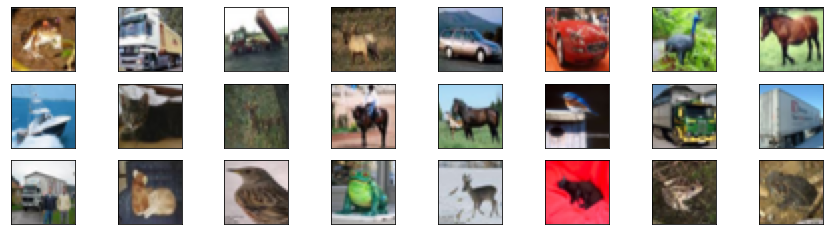

In [ ]:
fig = plt.figure(figsize=(15,4))

for i in range(24):
    ax = fig.add_subplot(3, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
datagem = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split=0.1)

datagem.fit(X_train)

## 모델 구성

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same',
                input_shape = (32, 32, 3),
                activation='relu'))
model.add(Conv2D(32 , kernel_size=3, padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),
             metrics = ['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 5, 64)          36928     
                                                      

In [ ]:
model.fit_generator(datagem.flow(X_train, y_train, batch_size=128),
                   epochs = 20,
                   verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
391/391 [==============================] - 27s 69ms/step - loss: 1.4657 - accuracy: 0.4747
Epoch 2/20
391/391 [==============================] - 35s 89ms/step - loss: 1.4659 - accuracy: 0.4745
Epoch 3/20
391/391 [==============================] - 27s 69ms/step - loss: 1.4657 - accuracy: 0.4748
Epoch 4/20
391/391 [==============================] - 27s 69ms/step - loss: 1.4576 - accuracy: 0.4791
Epoch 5/20
391/391 [==============================] - 26s 67ms/step - loss: 1.4501 - accuracy: 0.4827
Epoch 6/20
391/391 [==============================] - 27s 69ms/step - loss: 1.4516 - accuracy: 0.4831
Epoch 7/20
391/391 [==============================] - 27s 69ms/step - loss: 1.4435 - accuracy: 0.4836
Epoch 8/20
391/391 [==============================] - 27s 70ms/step - loss: 1.4438 - accuracy: 0.4813
Epoch 9/20
391/391 [==============================] - 27s 69ms/step - loss: 1.4404 - accuracy: 0.4869
Epoch 10/20
391/391 [==============================] - 29s 74ms/step - loss: 1.441

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test, batch_size = 128, verbose= 1)

79/79 [==============================] - 0s 6ms/step - loss: 406.8035 - accuracy: 0.2367


[406.8034973144531, 0.23669999837875366]

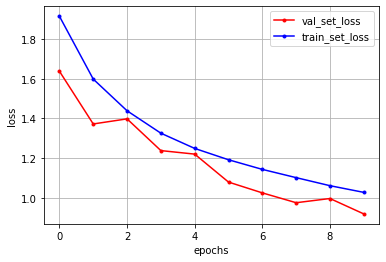

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

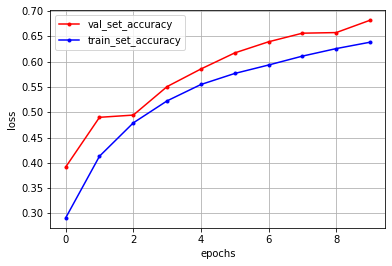

In [ ]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()